# Data Exploration

This is my exploration through the dataframes seeing what I can do with the information and how I should clean and use the available information. For more information about the datasets and their contained contents or the logistic regression model, see the README on my github, github.com/devin-lepur, for more information.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read datasets and add 'isLiked' column with default values to both dataframes
liked = pd.read_csv("/content/drive/MyDrive/MusicMachineLearningProject/database_likes.csv")
disliked = pd.read_csv("/content/drive/MyDrive/MusicMachineLearningProject/database_dislikes.csv")
liked["isLiked"] = True
disliked["isLiked"] = False

In [ ]:
liked.info()
disliked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Spotify ID        487 non-null    object 
 1   Artist IDs        487 non-null    object 
 2   Track Name        529 non-null    object 
 3   Album Name        518 non-null    object 
 4   Artist Name(s)    518 non-null    object 
 5   Release Date      487 non-null    object 
 6   Duration (ms)     529 non-null    int64  
 7   Popularity        529 non-null    int64  
 8   Added By          529 non-null    object 
 9   Added At          529 non-null    object 
 10  Genres            486 non-null    object 
 11  Danceability      487 non-null    float64
 12  Energy            487 non-null    float64
 13  Key               487 non-null    float64
 14  Loudness          487 non-null    float64
 15  Mode              487 non-null    float64
 16  Speechiness       487 non-null    float64
 1

Liked has a signinificant number of missing values which is expected due to the existance of local files.

Disliked surpringly has some although it only appears to be two.

In [ ]:
liked.columns

Index(['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name',
       'Artist Name(s)', 'Release Date', 'Duration (ms)', 'Popularity',
       'Added By', 'Added At', 'Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'isLiked'],
      dtype='object')

In [ ]:
#Drop missing values
liked.dropna(inplace=True)
disliked.dropna(inplace=True)

In [ ]:
#Demonstration of how the DataFrames look
print(liked)

                 Spotify ID  \
0    3oHkMCVJyOcjg5FhfLc2Rq   
1    51EC3I1nQXpec4gDk0mQyP   
2    7AvprzMsRJpybaalckaT8c   
3    3L0IKstjUgDFVQAbQIRZRv   
4    7aAEJfIzJUUSRXQNz2JzfO   
..                      ...   
524  0FA4wrjDJvJTTU8AepZTup   
525  1Rq4GtIucW9CAcF8B6PAbW   
526  787rCZF9i4L1cXGMkdyIk4   
527  2gbMPBrBVj3CuNTLp2dHYs   
528  2ZUJsR8HEktit58X6FuPQM   

                                            Artist IDs  \
0    13ubrt8QOOCPljQ2FL1Kca,3OsRAKCvk37zwYcnzRf5XF,...   
1        0Y5tJX1MQlPlqiwlOH1tJY,4dYQmk5ma04mZ1KJ9KkAQK   
2                               4MCBfE4596Uoi2O4DtmEMz   
3                               699OTQXzgjhIYAHMy9RyPD   
4                               0fA0VVWsXO9YnASrzqfmYu   
..                                                 ...   
524  4O15NlyKLIASxsJ0PrXPfz,0M2CO5ijP35MDhNwvpgxTV,...   
525                             1RyvyyTE3xzB2ZywiAwp0i   
526                             13ubrt8QOOCPljQ2FL1Kca   
527                             5K4W6rqBFWDnAN6

In [ ]:
print(disliked)

                 Spotify ID  \
0    5kkxyqYSQrnHpfsmkjKi81   
1    2ooF4088y5L72c4YTEJQoB   
2    3e7Y6sfFlIdBMJhX7wpqVO   
3    67T0J1IDGgRwNMp3vWYaVb   
4    08zAFXhfyIxq9359NHksdP   
..                      ...   
369  2c7sRekhMGlj7u1WIIzoQu   
370  3ZaEs1O8BG581qYPHpQ8d6   
371  4FdlNCxdyXOXKIZNKcIqAs   
372  4m4CMXt4jTczOLC14kG8cx   
373  7sTyAjxDXq9afwfSQy6D0s   

                                            Artist IDs  \
0                               1Bl6wpkWCQ4KVgnASpvzzA   
1                               15UsOTVnJzReFVN1VCnxy4   
2                               4xRYI6VqpkE3UwrDrAZL8L   
3        6fxyWrfmjcbj5d12gXeiNV,2P5sC9cVZDToPxyomzF1UH   
4    21dooacK2WGBB5amYvKyfM,3CbYyyd8wH3RT6t0jwpdzC,...   
..                                                 ...   
369                             3gBZUcNeVumkeeJ19CY2sX   
370  13ubrt8QOOCPljQ2FL1Kca,6Xb4ezwoAQC4516kI89nWz,...   
371  3VrGfWE8YdYMK4ySpnE0ly,2RDOrhPqAM4jzTRCEb19qX,...   
372  3VrGfWE8YdYMK4ySpnE0ly,15iVAtD3s3FsQR4w1v6

<Axes: title={'center': 'Disliked Popularity'}, ylabel='Frequency'>

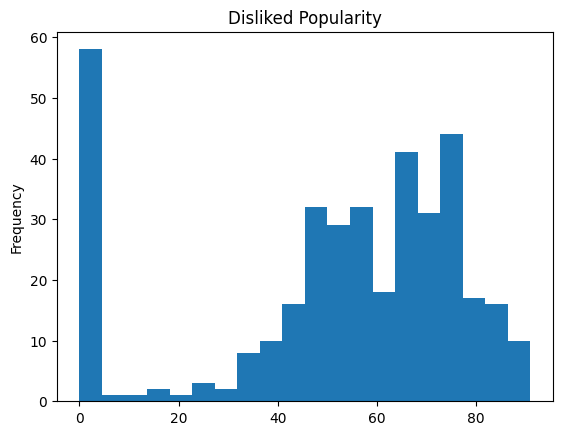

In [ ]:
popDf = pd.DataFrame(disliked["Popularity"])
popDf['Popularity'].plot(kind='hist', bins=20, title='Disliked Popularity')

In displaying the heads for disliked I noticed a song with a Popularity score of 0 which was alarming to me because almost all of the songs on this playlist should be somewhat popular given the nature of how they were taken from a public playlist. Also alarming were the two very popular artists on the one specific song. In looking further into it that song has 100 million streams on Spotify which surely would not correlate to a score of 0. In the representation above I also noticed the most common score in popularity for the dislikes is 0 so I will need to investigate.

In [ ]:
filtered_df = liked[liked["Popularity"] == 0]
print(filtered_df["Track Name"])

19                                       United In Grief
23                                          Count Me Out
24                                                Mirror
226                           On Time (with John Legend)
232    Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...
237              Trance (with Travis Scott & Young Thug)
480                                       Just What I Am
489                                                 Walk
492                                       Never Catch Me
502    F**kin' Problems (feat. Drake, 2 Chainz & Kend...
511                   Party and Bullshit - 2008 Remaster
527                                         Off The Grid
528                                      Heaven and Hell
Name: Track Name, dtype: object


In just a quick manual search of these songs makes me believe this is an error. The popularity value defined by Spotify is, "based, in the most part, on the total number of plays the track has had and how recent those plays are." The oldest of these songs is two years so it seems difficult to say they have a popularity of 0.

In [ ]:
filtered_df = liked[liked["Album Name"].isin(["HEROES & VILLAINS", "Mr. Morale & The Big Steppers"])]
print(filtered_df["Track Name"])

19                                       United In Grief
20                                                   N95
21                                              Die Hard
22                                           Rich Spirit
23                                          Count Me Out
24                                                Mirror
95                                                Savior
166                                                Crown
226                           On Time (with John Legend)
227    Superhero (Heroes & Villains) [with Future & C...
228    Niagara Falls (Foot or 2) [with Travis Scott &...
230    Too Many Nights (feat. Don Toliver & with Future)
231                        Around Me (feat. Don Toliver)
232    Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...
233               Raindrops (Insane) [with Travis Scott]
234               Umbrella (with 21 Savage & Young Nudy)
235                       Metro Spider (with Young Thug)
236    I Can't Save You (Interl

Here are all the songs within the same albums as the songs with 0 for popularity in the liked dataframe. Not a single one of the songs on the 0 popularity list are the least listened to, and, by nature, are not older than any of the other songs. This indicates that there is, to some extent, an error.
I am thinking this is likely to not be treated as I can't remove every song with a score of 0 in popularity because some of them could very well have a 0. I will likely experiment with the model to see if removing the column all together provides any increase and decrease in the accuracy of the model.

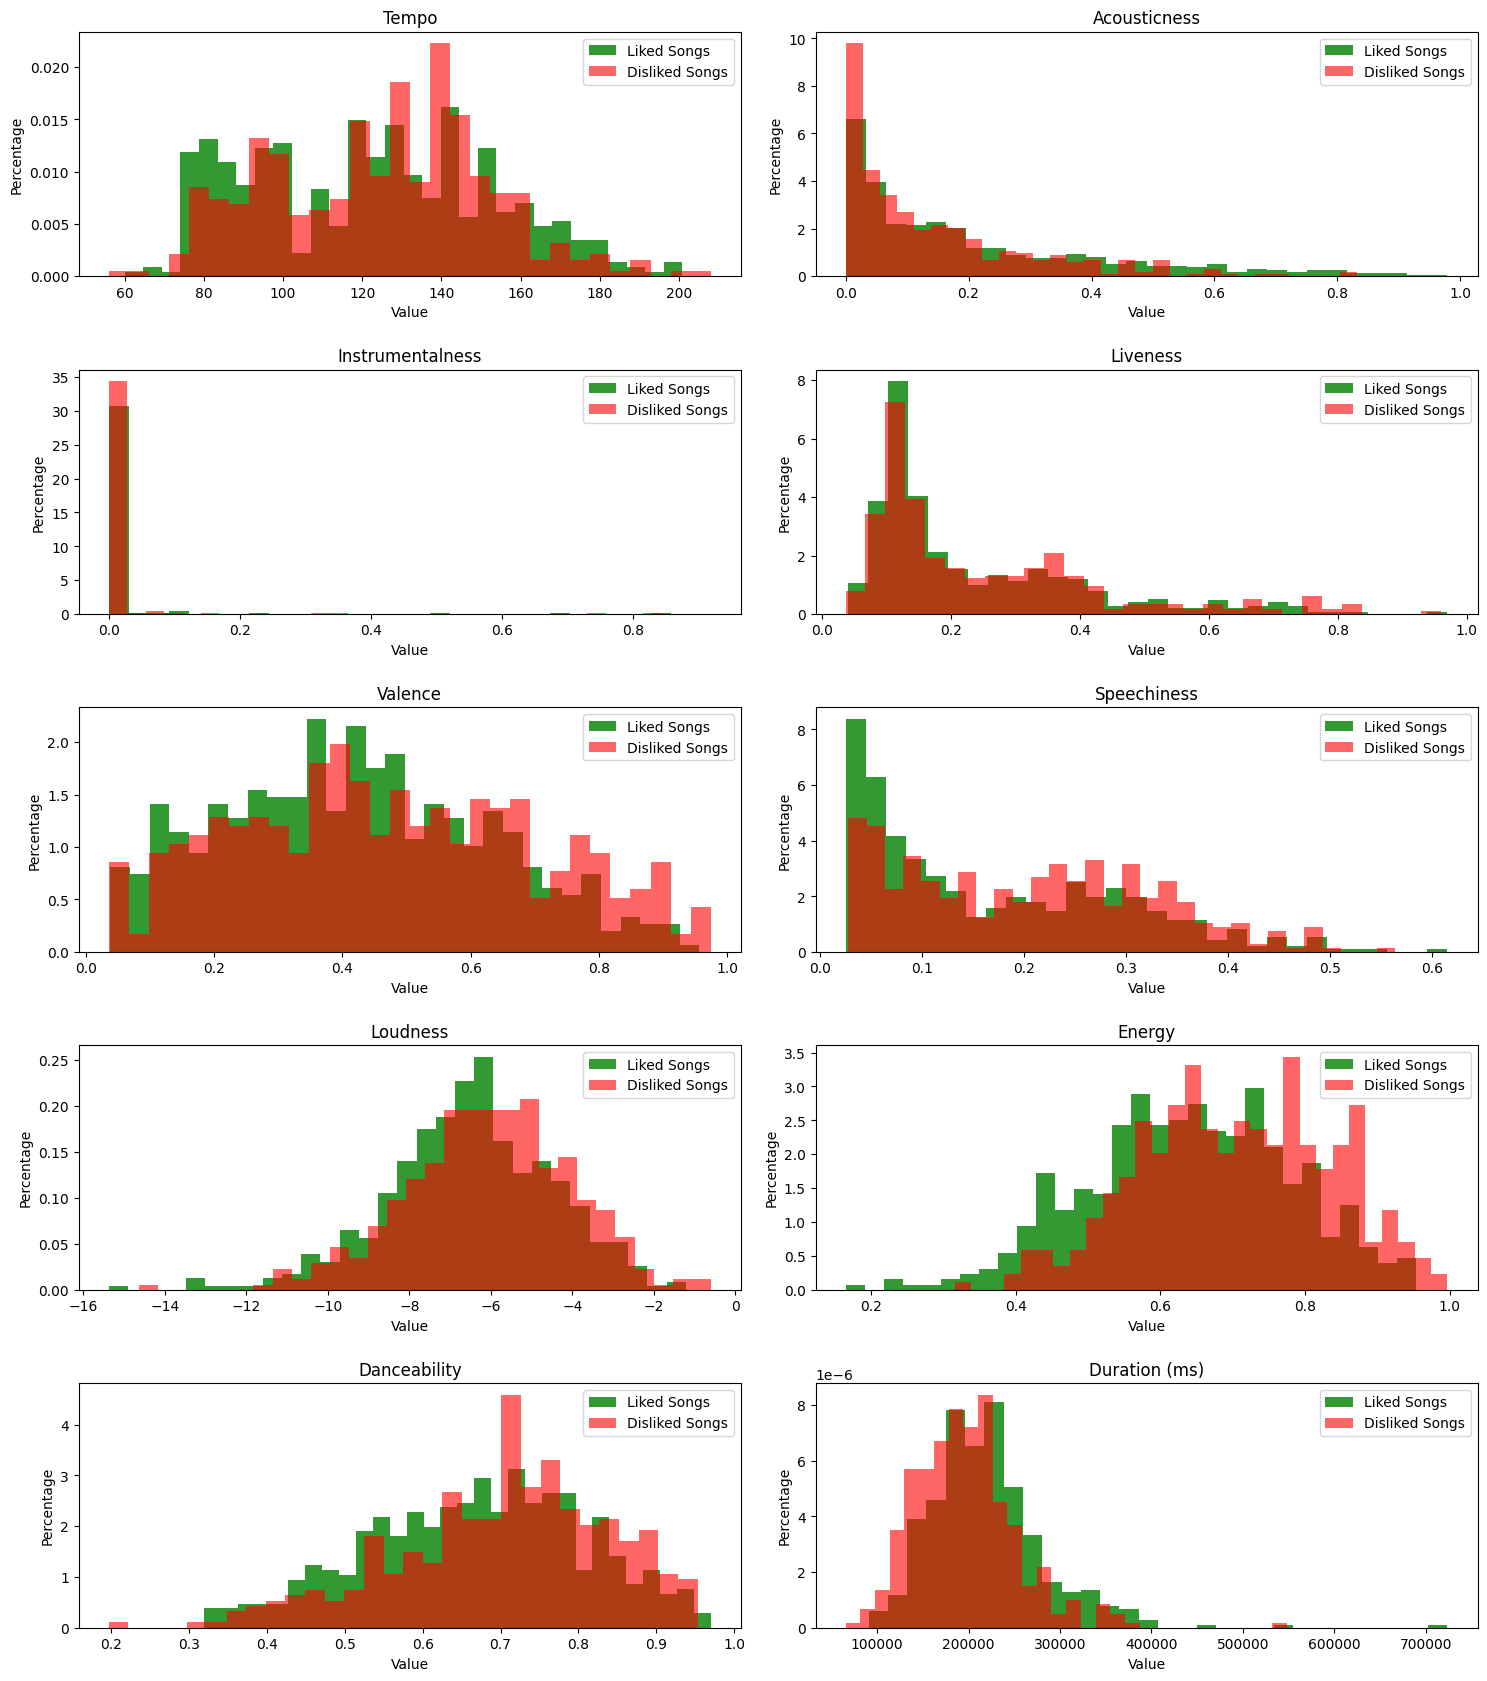

In [ ]:
#Generate Frequency graphs for all of the numeric features
plt.figure(figsize=(15,30))

for i,category in enumerate(['Tempo', 'Acousticness', 'Instrumentalness', 'Liveness',
                            'Valence', 'Speechiness', 'Loudness', 'Energy', 'Danceability', 'Duration (ms)']):
    plt.subplot(9, 2, i+1)

    #Graph and normalize the data to remove imbalance in the two sets
    plt.hist(liked[category], bins=30, color = "green", alpha = .8, label= "Liked Songs", density=True)
    plt.hist(disliked[category], bins =30, color = "red", alpha = .6, label= "Disliked Songs", density=True)
    plt.xlabel('Value')
    plt.ylabel('Percentage')
    plt.title(category)
    plt.legend()

plt.tight_layout(h_pad=2, w_pad=2)

plt.show()

There's two major things I notice with these visualizations. Firstly Instrumentalness will likely have little to no impact on the accuracy of the model due to how very clearly skewed it is in both models. The second thing I noticed is the fact that there is a slight pattern between the duration of the song and the likability. This was the opposite of what I suspected. Despite this I will still likely not include duration in the final model because I don't really think of a song being ruined by its length (as shown by the twelve minute song) and as a result I don't want the model to suggest songs simply because they aare of a certain length.

In [ ]:
#Avoid issue with matplotlib and artists with a "$" in their name
data = liked
data["Artist Name(s)"] = data["Artist Name(s)"].str.replace("$", "\$")

<ipython-input-119-ab3191126861>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Artist Name(s)"] = data["Artist Name(s)"].str.replace("$", "\$")


number of unique artists: 203


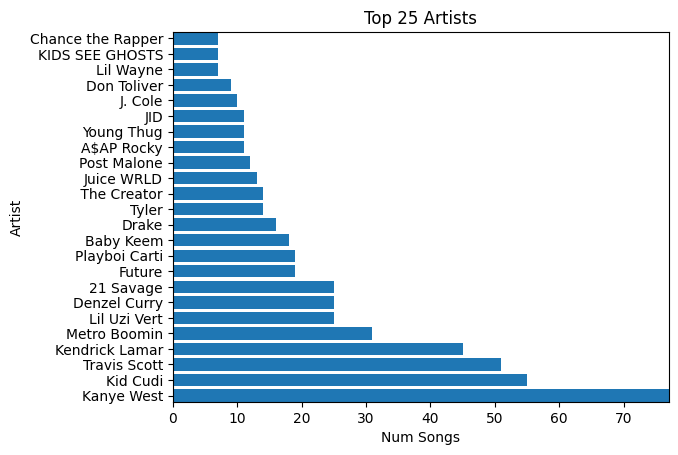

In [ ]:
artists = defaultdict(int)
for i,song in data.iterrows():
	for musician in song['Artist Name(s)'].split(','):
		artists[musician] += 1

# sort for chart
artists = pd.DataFrame(artists.items(), columns=['Artist', 'Num Songs']
                          ).sort_values('Num Songs', ascending=False).reset_index(drop=True)
print("number of unique artists:", artists.shape[0])

#Create a horizontal bar graph for readability
plt.barh(artists['Artist'][:24], artists['Num Songs'][:24])
plt.xlabel(artists.columns[1])
plt.ylabel(artists.columns[0])
plt.title('Top 25 Artists')
plt.autoscale(tight=True)
plt.show()

I have yet to decide how to deal with the Artist category. The category containts helpful information however I suspect there are some flaws that need to be avoided. A normalized label encoding based of frequency seems nice but ignores two things. Firstly, how many songs the artist has. For example, Kanye West has about 75 appearances here, however this is closer to 10% of his songs whereas Baby Keem has about 17 but only 90 released songs coming out to 19% of his songs. Label encoding however would boost Kanye's weighting by factor of about 4 over Baby Keem. There seems to be a simple solution of turning this feature into a percent of all artist songs that are on the playlist but this has two issues again. The scale of finding out this percentage for every unique artist, and also the fact that it assumes the listener has heard every song from the included artists.

Im leaning toward a simple normalized label encoding based on frequency but mapping the lowest value to 0 so that the model doesn't assume a value of 0 here equated to dislike. I do need to decide if I don't care about feature artists or how to incorporate them into this value.

(Note for myself in the future, "Tyler, the Creator" is being split into "Tyler" and "the Creator")

number of unique genres: 192


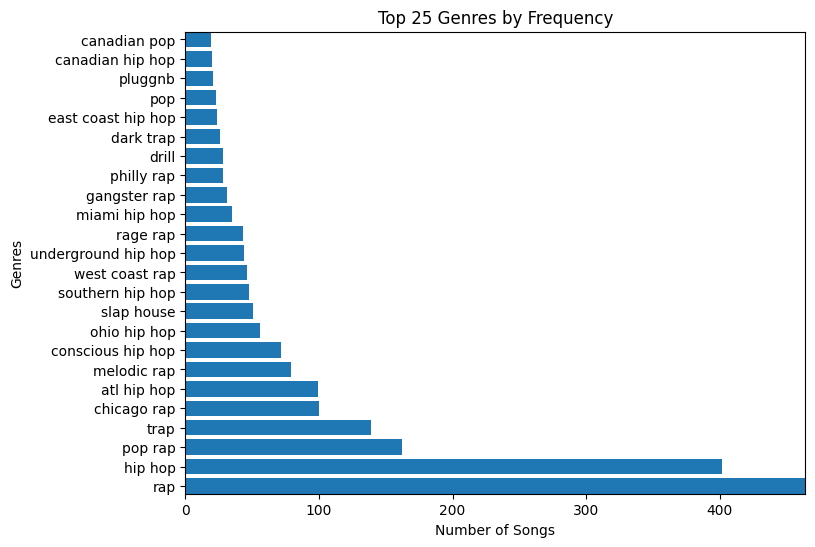

In [ ]:
#Generate a frequency graph of split genres (top 25 for readability)
data = liked
genres = defaultdict(int)
for i,song in data.iterrows():
	for genre in song['Genres'].split(','):
		genres[genre] += 1

# sort for chart
genres = pd.DataFrame(genres.items(), columns=['Genres', 'Number of Songs']
                          ).sort_values('Number of Songs', ascending=False).reset_index(drop=True)
print("number of unique genres:", genres.shape[0])

plt.figure(figsize=(8, 6))
#Create a horizontal bar graph for readability
plt.barh(genres['Genres'][:24], genres['Number of Songs'][:24])
plt.xlabel(genres.columns[1])
plt.ylabel(genres.columns[0])
plt.title('Top 25 Genres by Frequency')
plt.autoscale(tight=True)
plt.show()

Similar issues here to the artist feature. However, this time there is no chance of calculating the genre frequencies as a percent of a whole. Will need to label encode to include in the model and, again, determine how multiple listed genres willl be included

In [ ]:
#Drop columns to not be used and display remaining contents
newliked = liked.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name',
       'Artist Name(s)', 'Release Date', 'Duration (ms)', 'Added By', 'Added At', 'Genres'])
newdisliked = disliked.drop(columns=['Spotify ID', 'Artist IDs', 'Track Name', 'Album Name',
       'Artist Name(s)', 'Release Date', 'Duration (ms)', 'Added By', 'Added At', 'Genres'])
print(newliked)

     Popularity  Danceability  Energy   Key  Loudness  Mode  Speechiness  \
0            64         0.428   0.754   5.0    -6.416   0.0       0.1790   
1            84         0.402   0.526   9.0    -6.741   0.0       0.0904   
2            71         0.621   0.695   4.0    -5.124   1.0       0.0911   
3            79         0.725   0.725   8.0    -6.067   0.0       0.1590   
4            60         0.516   0.708   9.0    -4.465   0.0       0.0253   
..          ...           ...     ...   ...       ...   ...          ...   
524          84         0.686   0.897  11.0    -7.180   0.0       0.0386   
525          75         0.636   0.570   1.0    -5.973   1.0       0.0571   
526          73         0.597   0.427   5.0    -6.764   0.0       0.0536   
527           0         0.546   0.640   8.0    -5.582   1.0       0.3700   
528           0         0.764   0.422   0.0    -7.265   0.0       0.1190   

     Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0         0.30000   

# Conclusion

Due to the distribution of the variables and the similarities of the music, I find it difficult to believe that the model will be very accurate without Artist and or Genre data. This is furthered by the fact that both the liked and disliked data sets are mostly rap/hip-hop and are, by definition, similar. I have decided that I will not be including artists or Genres because I think it would skew too heavily toward rap/hip-hop and artists I frequent and would prefer it to be slightly more forgiving to new music.